<a href="https://colab.research.google.com/github/vivekgautamgv/Python-For-Finance/blob/main/Crypto_returns_25k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-bd63cfb208e8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
<ipython-input-1-bd63cfb208e8>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Position'][i] == 1:
<ipython-input-1-bd63cfb208e8>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

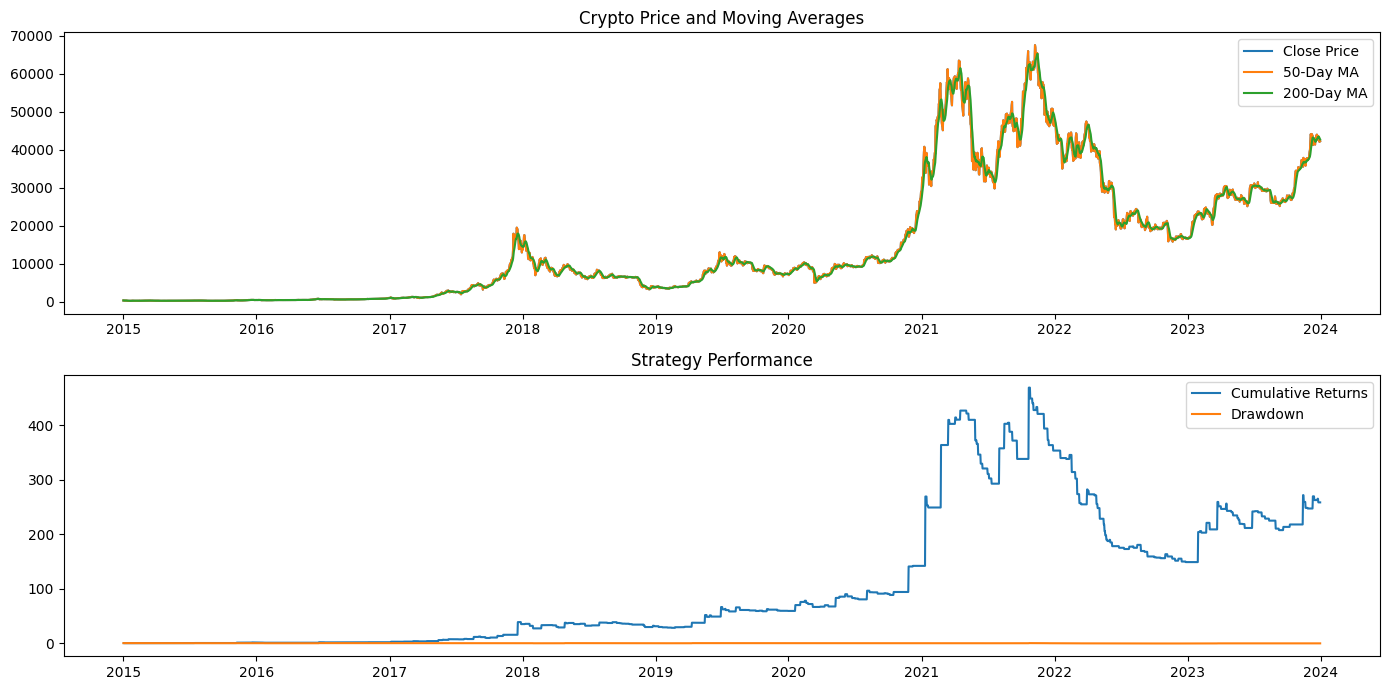

Final Return: 25844.06%
Max Drawdown: 68.14%
Total Trade :  586


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define parameters
symbol = 'BTC-USD'  # Crypto symbol
start_date = '2015-01-01'
end_date = '2024-01-01'
short_window = 1 #50
long_window = 8 #200

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

# Backtesting the strategy
initial_capital = 10000
shares = 0
capital = initial_capital
position = 0
equity = []
trade_number = 0

for i in range(len(data)):
    if data['Position'][i] == 1:
        # Buy
        shares = capital / data['Close'][i]
        position = shares * data['Close'][i]
        capital = 0
        trade_number += 1
    elif data['Position'][i] == -1:
        # Sell
        capital = shares * data['Close'][i]
        shares = 0
        position = 0
        trade_number += 1
    equity.append(capital + position)

data['Equity'] = equity

# Calculate returns and drawdown
data['Returns'] = data['Equity'].pct_change()
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Drawdown'] = data['Equity'] / data['Equity'].cummax() - 1

# Plot results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['Short_MA'], label='50-Day MA')
plt.plot(data.index, data['Long_MA'], label='200-Day MA')
plt.title('Crypto Price and Moving Averages')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.plot(data.index, data['Drawdown'], label='Drawdown')
plt.title('Strategy Performance')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
final_return = data['Cumulative_Returns'].iloc[-1]
max_drawdown = data['Drawdown'].min()

print(f"Final Return: {final_return * 100:.2f}%")
print(f"Max Drawdown: {-max_drawdown * 100:.2f}%")
print("Total Trade : ",trade_number)
